**Step 1: IMPORT LIBRARIES**

In [1]:
import yfinance as yf

**yfinance is a Python library that allows you to:**

✅ Download real stock market data
✅ Access data from Yahoo Finance
✅ Pull data for stocks like Apple, Tesla, Google, etc.
✅ Get prices, volume, dividends, financials, etc.

In [2]:
pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

**pandas** is a powerful Python library for data manipulation and analysis, especially for structured data (tables). It helps you handle, clean, and analyze data more efficiently.

**matplotlib** is a Python plotting library used for creating visualizations like graphs and charts.

**Step 2: Download Apple stock data**

In [4]:
df = yf.download('AAPL', start='2019-01-01', end='2024-12-31')

/tmp/ipython-input-694915226.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.538818,37.759889,36.661676,36.818564,148158800
2019-01-03,33.799671,34.638779,33.754506,34.225167,365248800
2019-01-04,35.242558,35.311495,34.182383,34.355908,234428400
2019-01-07,35.164112,35.378051,34.681566,35.347148,219111200
2019-01-08,35.834454,36.088803,35.304366,35.551581,164101200
...,...,...,...,...,...
2024-12-23,254.120697,254.498976,252.308884,253.622948,40858800
2024-12-24,257.037506,257.047440,254.140589,254.339701,23234700


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.538818,37.759889,36.661676,36.818564,148158800
2019-01-03,33.799671,34.638779,33.754506,34.225167,365248800
2019-01-04,35.242558,35.311495,34.182383,34.355908,234428400
2019-01-07,35.164112,35.378051,34.681566,35.347148,219111200
2019-01-08,35.834454,36.088803,35.304366,35.551581,164101200


In [7]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,254.120697,254.498976,252.308884,253.622948,40858800
2024-12-24,257.037506,257.047440,254.140589,254.339701,23234700
2024-12-26,257.853760,258.928914,256.470034,257.027510,27237100
2024-12-27,254.439224,257.535238,251.920617,256.669129,42355300
2024-12-30,251.064484,252.358634,249.621015,251.094347,35557500


In [8]:
df.shape

(1509, 5)

In [9]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [10]:
df.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2019-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1509 non-null   float64
 1   (High, AAPL)    1509 non-null   float64
 2   (Low, AAPL)     1509 non-null   float64
 3   (Open, AAPL)    1509 non-null   float64
 4   (Volume, AAPL)  1509 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.7 KB


In [12]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1509.000000,1509.000000,1509.000000,1509.000000,1.509000e+03
mean,134.608927,135.941129,133.112839,134.463210,9.420399e+07
std,53.935055,54.325281,53.467108,53.878231,5.232393e+07
min,33.799671,34.638779,33.754506,34.225167,2.323470e+07
25%,88.476143,89.841457,87.852898,88.514939,5.914450e+07
50%,142.940994,144.480327,141.249072,142.793683,8.153200e+07
75%,171.671066,173.138331,169.810987,171.512085,1.124244e+08
max,257.853760,258.928914,256.470034,257.027510,4.265100e+08


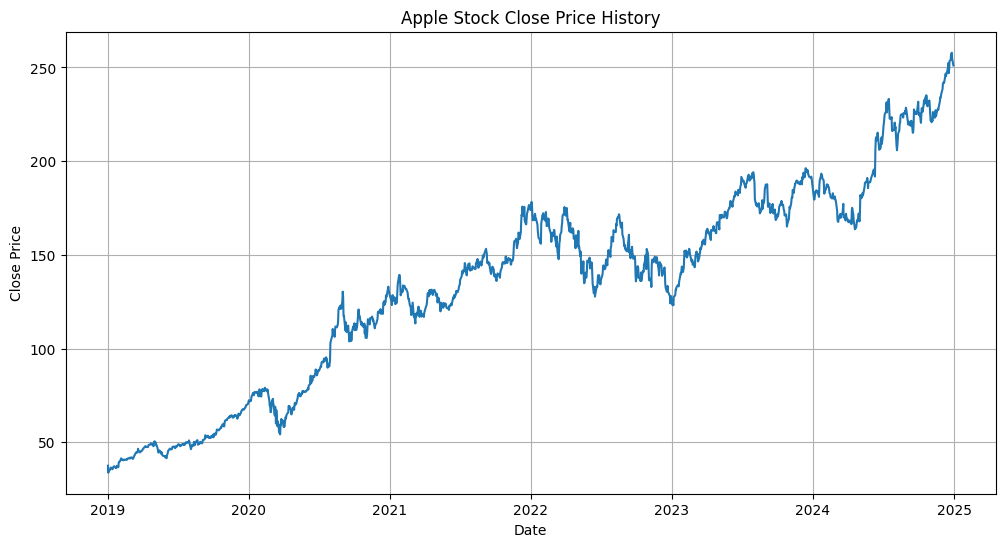

In [13]:
# Plot the 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('Apple Stock Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


**Step 3: Data Preparation for RNN**

In [14]:
pip install scikit-learn

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# numpy (np): A library used for handling numerical data and arrays.
# MinMaxScaler: A tool from scikit-learn that scales/normalizes your data between a given range — here it's 0 to 1.


close_data = df['Close'].values
# Extracts just the 'Close' column from your DataFrame and converts it into a NumPy array (needed for scaling and RNN training).
close_data = close_data.reshape(-1, 1)
# RNN models expect 2D input for scaling, and here we turn a flat array into a 2D array.


# Normalize the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)


✅ In short: We're preparing your stock prices so that they’re in the right format and scale for an RNN model to learn from.

**Step 4: Create the training sequences (x_train, y_train)**

In [16]:
sequence_length = 60  # 60 previous days will be used to predict the 61st

x_train = []  #sequences of 60 prices
y_train = []  #the price that comes after each sequence

for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i-sequence_length:i, 0])  # last 60 values
    y_train.append(scaled_data[i, 0])                    # 61st value

# Convert to numpy arrays and reshape for RNN input (3d)
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # (samples, time steps, features)


**Step 6: Build and train the RNN model using TensorFlow/Keras**

We’ll use LSTM, a special type of RNN that works well with time-series data like stock prices.

**Long Short-Term Memory**

It’s a special type of Recurrent Neural Network (RNN) that’s really good at learning from sequential data, like:

Stock prices over time 📈

Temperature readings 🌡️

Text, speech, and time series ⏳

**Why not just use a regular RNN?**

Regular RNNs forget long-term patterns easily. LSTM solves this with a "memory cell" that can remember important information for long periods.

In [17]:
pip install tensorflow

**TensorFlow** is an open-source deep learning framework developed by Google.
It helps you build and train powerful machine learning and deep learning models.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [19]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [20]:
# Step 1: Initialize the model
model = Sequential()

# Step 2: Add LSTM Layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))

# Step 3: Add Dense Output Layer
model.add(Dense(units=1))  # Output: Predicting 1 value (next day price)

# Step 4: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.1028
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0026
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 6.9007e-04
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 6.4457e-04
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 5.9627e-04
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.1425e-04
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.8280e-04
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.6114e-04
Epoch 9/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.7903e-04
Epoch 10/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.4193e-04


**Step 7: Make Predictions and Visualize Results**

**Preprocess Test Data**

In [21]:
# Use only the 'Close' price
test_close =df['Close'].values.reshape(-1, 1)

# Scale using the same scaler used on training data
scaled_test = scaler.transform(test_close)


In [22]:
# now prediction
predicted_prices = model.predict(x_train)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Convert back to original scale


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


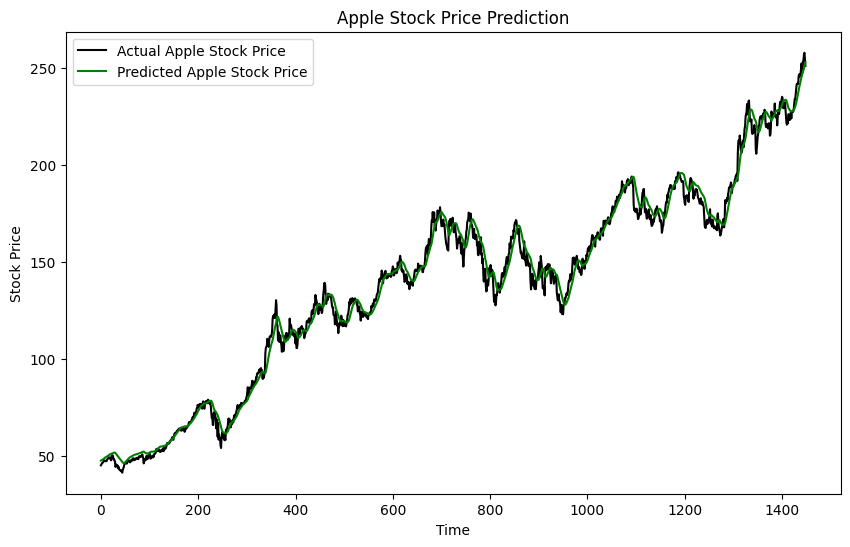

In [23]:
# Actual prices (from test set, excluding first 60)
real_prices = test_close[60:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(real_prices, color='black', label='Actual Apple Stock Price')
plt.plot(predicted_prices, color='green', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
